In [1]:
import numpy as np
from numpy import array
import numpy.polynomial.polynomial as poly
import pandas as pd
import datetime as dt
import seaborn
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
seaborn.set(rc={'figure.figsize':(16,8.27)})

In [3]:
df = pd.read_csv('indexData.csv')

In [4]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [5]:
df.info

<bound method DataFrame.info of        Index        Date         Open         High          Low        Close  \
0        NYA  1965-12-31   528.690002   528.690002   528.690002   528.690002   
1        NYA  1966-01-03   527.210022   527.210022   527.210022   527.210022   
2        NYA  1966-01-04   527.840027   527.840027   527.840027   527.840027   
3        NYA  1966-01-05   531.119995   531.119995   531.119995   531.119995   
4        NYA  1966-01-06   532.070007   532.070007   532.070007   532.070007   
...      ...         ...          ...          ...          ...          ...   
112452  N100  2021-05-27  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100  2021-05-28  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100  2021-05-31  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100  2021-06-01  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100  2021-06-02  1258.489990  1263.709961  1258.239990  1263.619995   

       

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [7]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df_NYA = df[df["Index"].isin(['NYA'])].sort_values('Date')

In [10]:
df_NYA

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


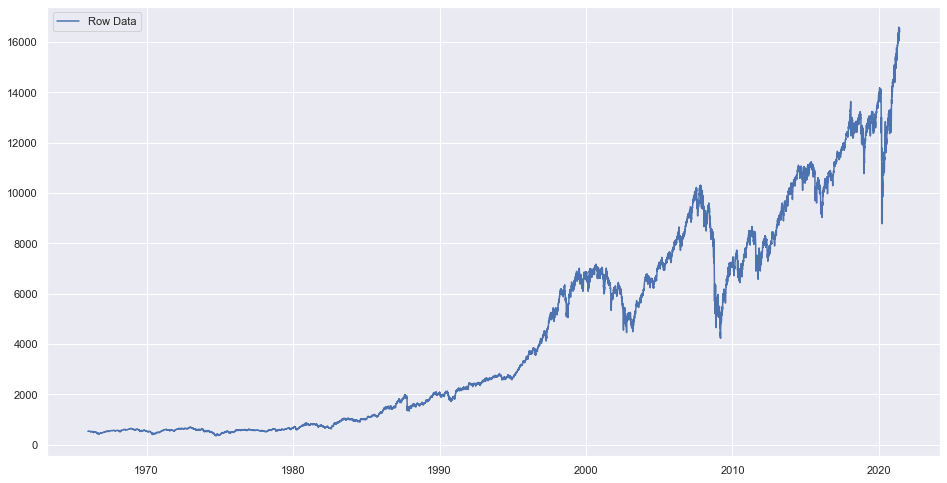

In [11]:
plt.plot(df_NYA["Date"],df_NYA["Close"],label='Row Data')
plt.legend()

In [12]:
df_NYA_data_close = df_NYA[["Date","Close"]]

In [13]:
df_NYA_data_close

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
13943,2021-05-24,16464.689450
13944,2021-05-25,16390.189450
13945,2021-05-26,16451.960940
13946,2021-05-27,16531.949220


In [14]:
df_NYA_data_close.isnull().sum()

Date     0
Close    1
dtype: int64

In [15]:
df_NYA_data_close.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13938, 13939, 13940, 13941, 13942, 13943, 13944, 13945, 13946,
            13947],
           dtype='int64', length=13948)

In [16]:
np.where(df_NYA_data_close['Close'].isnull())[0]

array([289])

In [17]:
df_NYA_data_close.iloc[[289]]

,Date,Close
289,1967-02-23,NaN


In [18]:
df_NYA_data_close_withoutnan = df_NYA_data_close.dropna()

In [19]:
df_NYA_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

In [20]:
np.where(df_NYA_data_close_withoutnan['Close'].isnull())[0]

array([], dtype=int64)

In [21]:
data_train = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date < "2010-01-01"]
data_test = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date >= "2010-01-01"]

In [22]:
data_train

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
11072,2009-12-24,7255.000000
11073,2009-12-28,7261.240234
11074,2009-12-29,7252.189941
11075,2009-12-30,7241.240234


In [23]:
data_train.Date = data_train.Date.map(dt.datetime.toordinal)

/Users/jeremy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
X_train = data_train.Date[:, np.newaxis]

In [25]:
X_train

array([[717701],
       [717704],
       [717705],
       ...,
       [733770],
       [733771],
       [733772]])

In [26]:
y_train = data_train.Close

In [27]:
y_train.isnull().sum()

0

In [28]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=50).fit(X_train, y_train)

In [29]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [30]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [31]:
X_all = df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]

In [32]:
X_all

array([[717701],
       [717704],
       [717705],
       ...,
       [737936],
       [737937],
       [737938]])

In [33]:
np.where(df_NYA_data_close_withoutnan['Date'] == '1966-01-05')[0]

array([3])

In [34]:
X_all[3]

array([717706])

In [35]:
pred_tree = tree.predict(X_all)
pred_model_rf = model_rf.predict(X_all)
pred_lr = linear_reg.predict(X_all)
X = np.array(data_train.Date)
y = np.array(data_train.Close)
model_coef_polyfit = poly.polyfit(X, y, 3)
X_new = np.array(df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal))
ffit = poly.polyval(X_new, model_coef_polyfit)
X_new = pd.DataFrame(X_new,columns=['Date'])
X_new = X_new.Date.map(dt.datetime.fromordinal)

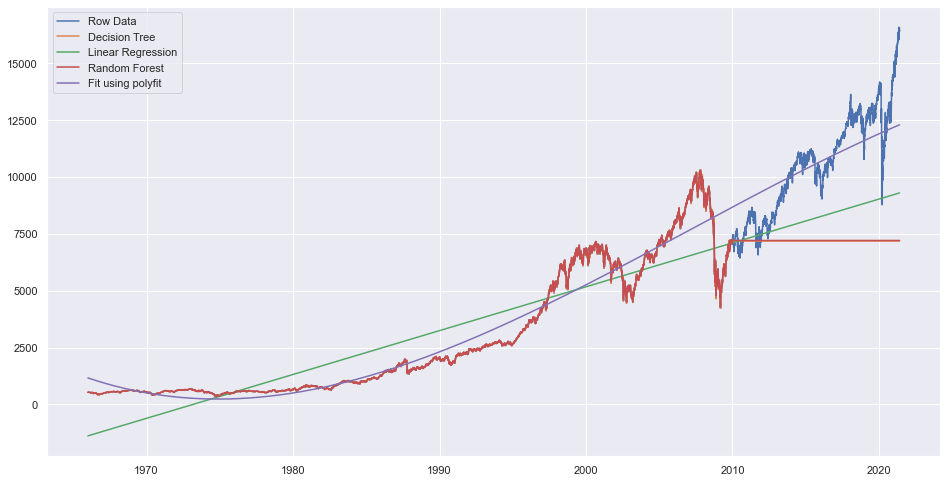

In [36]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,label='Row Data')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_tree,label='Decision Tree')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_lr,label='Linear Regression')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_model_rf,label='Random Forest')
plt.plot(X_new,ffit,label='Fit using polyfit')
plt.legend()

In [37]:
tree.score(X_all,df_NYA_data_close_withoutnan.Close)

0.7973522670100477

In [38]:
linear_reg.score(X_all,df_NYA_data_close_withoutnan.Close)

0.8281145573435131

In [39]:
model_rf.score(X_all,df_NYA_data_close_withoutnan.Close)

0.7993780022602845

In [40]:
df_N100 = df[df["Index"].isin(['N100'])].sort_values('Date')

In [41]:
new_index = np.arange(0,len(df_N100.Close),1)

In [42]:
len(df_N100.Close)

5507

In [43]:
df_N100_data_close = df_N100[["Date","Close"]]
df_N100_data_close

,Date,Close
106950,1999-12-31,1000.000000
106951,2000-01-03,996.770020
106952,2000-01-04,955.969971
106953,2000-01-05,930.260010
106954,2000-01-06,922.460022
...,...,...
112452,2021-05-27,1247.069946
112453,2021-05-28,1256.599976
112454,2021-05-31,1248.930054
112455,2021-06-01,1258.579956


In [44]:
df_N100_data_close.index

Int64Index([106950, 106951, 106952, 106953, 106954, 106955, 106956, 106957,
            106958, 106959,
            ...
            112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454,
            112455, 112456],
           dtype='int64', length=5507)

In [45]:
df_N100_data_close.isnull().sum()

Date      0
Close    33
dtype: int64

In [46]:
df_N100_data_close_withoutnan = df_N100_data_close.dropna()

In [47]:
len(df_N100_data_close_withoutnan.Close)

5474

In [48]:
df_N100_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

In [49]:
data_train_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date < "2015-01-01"]
data_test_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date >= "2015-01-01"]

In [50]:
df_N100_data_close_withoutnan.index

Int64Index([106950, 106951, 106952, 106953, 106954, 106955, 106956, 106957,
            106958, 106959,
            ...
            112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454,
            112455, 112456],
           dtype='int64', length=5474)

In [51]:
data_train_N100.Date = data_train_N100.Date.map(dt.datetime.toordinal)

/Users/jeremy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
data_train_N100.Close

106950    1000.000000
106951     996.770020
106952     955.969971
106953     930.260010
106954     922.460022
             ...     
110811     846.840027
110812     843.859985
110813     846.969971
110814     834.340027
110815     839.520020
Name: Close, Length: 3834, dtype: float64

In [53]:
X_train_N100 = data_train_N100.Date[:, np.newaxis]
y_train_N100 = data_train_N100.Close

In [54]:
tree_N100 = DecisionTreeRegressor(criterion='mse',max_depth=50).fit(X_train_N100, y_train_N100)
linear_reg_N100 = LinearRegression().fit(X_train_N100, y_train_N100)
model_rf_N100 = RandomForestRegressor(n_estimators=10).fit(X_train_N100, y_train_N100)

In [55]:
X_all_N100 = df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]

In [56]:
pred_tree_N100 = tree_N100.predict(X_all_N100)
pred_lr_N100 = linear_reg_N100.predict(X_all_N100)
pred_model_rf_N100 = model_rf_N100.predict(X_all_N100)

In [57]:
X_N100 = np.array(data_train_N100.Date)
y_N100 = np.array(data_train_N100.Close)
model_coef_polyfit = poly.polyfit(X_N100, y_N100, 2)
X_new_N100 = np.array(df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal))
ffit_N100 = poly.polyval(X_new_N100, model_coef_polyfit)
X_new_N100 = pd.DataFrame(X_new_N100,columns=['Date'])
X_new_N100 = X_new_N100.Date.map(dt.datetime.fromordinal)

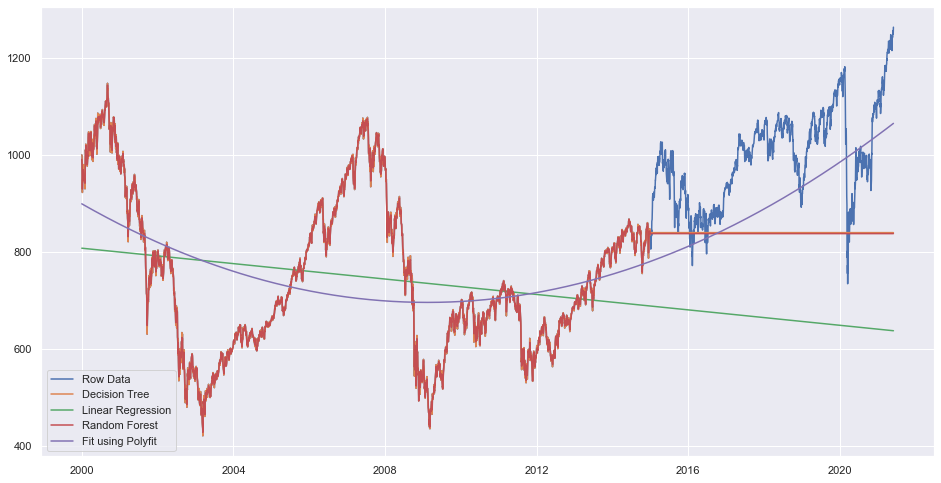

In [58]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,label='Row Data')
plt.plot(df_N100_data_close_withoutnan.Date,pred_tree_N100,label='Decision Tree')
plt.plot(df_N100_data_close_withoutnan.Date,pred_lr_N100,label='Linear Regression')
plt.plot(df_N100_data_close_withoutnan.Date,pred_model_rf_N100,label='Random Forest')
plt.plot(X_new_N100,ffit_N100,label='Fit using Polyfit')
plt.legend()

In [59]:
# split data into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [60]:
data_train = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date < "2010-01-01"]
data_test = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date >= "2010-01-01"]
data_train

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
11072,2009-12-24,7255.000000
11073,2009-12-28,7261.240234
11074,2009-12-29,7252.189941
11075,2009-12-30,7241.240234


In [61]:
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split data into samples
X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(11066, 10, 1)


In [62]:
# model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 200)           161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 200)           320800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [63]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
232/232 - 19s - loss: 426602.4062 - accuracy: 0.0000e+00 - val_loss: 56814.4648 - val_accuracy: 0.0000e+00
Epoch 2/10
232/232 - 15s - loss: 685.1949 - accuracy: 0.0000e+00 - val_loss: 48991.5820 - val_accuracy: 0.0000e+00
Epoch 3/10
232/232 - 12s - loss: 554.3387 - accuracy: 0.0000e+00 - val_loss: 60802.7734 - val_accuracy: 0.0000e+00
Epoch 4/10
232/232 - 13s - loss: 484.7880 - accuracy: 0.0000e+00 - val_loss: 45231.6875 - val_accuracy: 0.0000e+00
Epoch 5/10
232/232 - 16s - loss: 449.8907 - accuracy: 0.0000e+00 - val_loss: 56070.0156 - val_accuracy: 0.0000e+00
Epoch 6/10
232/232 - 18s - loss: 483.9081 - accuracy: 0.0000e+00 - val_loss: 49297.3555 - val_accuracy: 0.0000e+00
Epoch 7/10
232/232 - 12s - loss: 1140.8700 - accuracy: 0.0000e+00 - val_loss: 55005.5781 - val_accuracy: 0.0000e+00
Epoch 8/10
232/232 - 12s - loss: 983.2718 - accuracy: 0.0000e+00 - val_loss: 53749.0078 - val_accuracy: 0.0000e+00
Epoch 9/10
232/232 - 12s - loss: 549.1917 - accuracy: 0.0000e+00 - val_loss:

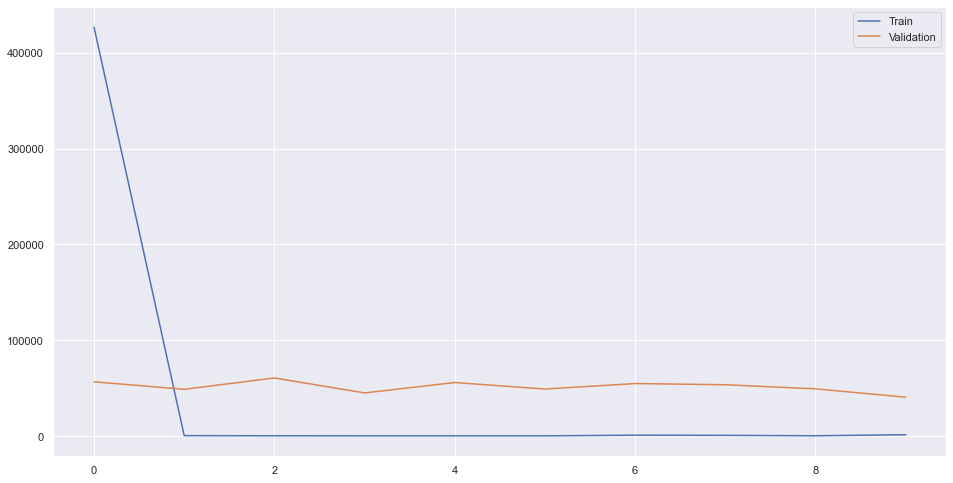

In [64]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

In [65]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_1 = model.predict(x_input, verbose=0)
print(yhat_1)

(2861, 10)
[[ 7373.2085]
 [ 7387.354 ]
 [ 7403.2256]
 ...
 [16250.196 ]
 [16324.82  ]
 [16367.822 ]]


In [66]:
test_mean_1 = np.mean(yhat_1,axis=1)
print(test_mean_1)

[ 7373.2085  7387.354   7403.2256 ... 16250.196  16324.82   16367.822 ]


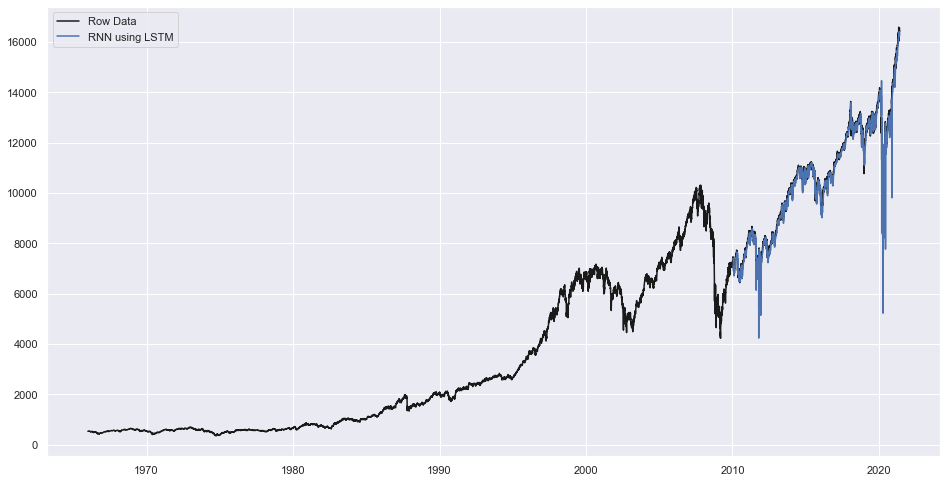

In [67]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test.Date[10:],test_mean_1,label='RNN using LSTM')
plt.legend()

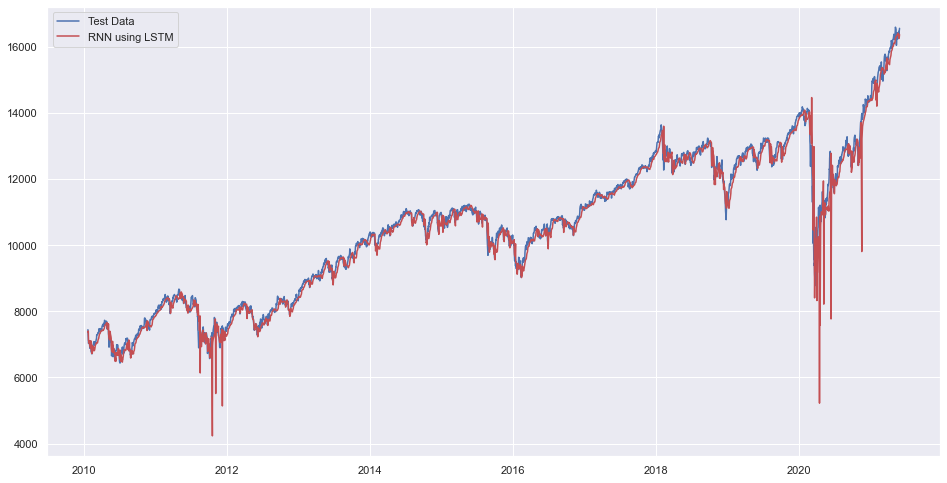

In [68]:
plt.plot(data_test.Date[10:],data_test.Close[10:],'-b',label='Test Data')
plt.plot(data_test.Date[10:],test_mean_1,'r',label='RNN using LSTM')
plt.legend()

In [69]:
r2_score(data_test.Close[10:], test_mean_1)

0.9809983238468288

In [70]:
mean_squared_error(data_test.Close[10:],test_mean_1)

92282.59896556806

In [71]:
((test_mean_1-data_test.Close[10:])**2).sum()/len(test_mean_1)

92282.59896556806

In [72]:
((test_mean_1-data_test.Close[10:])**2).mean()

92282.59896556794

In [73]:
# choose a number of time steps
n_steps_in, n_steps_out = 10, 9
# split into samples
X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(11058, 10, 1)


In [74]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 200)           161600    
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 200)           320800    
_________________________________________________________________
lstm_5 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1809      
Total params: 805,009
Trainable params: 805,009
Non-trainable params: 0
_________________________________________________________________


In [75]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
232/232 - 15s - loss: 413872.3438 - accuracy: 0.0833 - val_loss: 316219.9062 - val_accuracy: 0.1014
Epoch 2/10
232/232 - 12s - loss: 3561.5486 - accuracy: 0.1115 - val_loss: 73159.3750 - val_accuracy: 0.1595
Epoch 3/10
232/232 - 12s - loss: 2148.6343 - accuracy: 0.1091 - val_loss: 175385.5469 - val_accuracy: 0.0770
Epoch 4/10
232/232 - 12s - loss: 1381.0541 - accuracy: 0.1002 - val_loss: 57821.7539 - val_accuracy: 0.0863
Epoch 5/10
232/232 - 12s - loss: 1459.3569 - accuracy: 0.1130 - val_loss: 64209.3594 - val_accuracy: 0.1036
Epoch 6/10
232/232 - 11s - loss: 8426.3438 - accuracy: 0.1016 - val_loss: 2782261.0000 - val_accuracy: 0.1449
Epoch 7/10
232/232 - 11s - loss: 24348.6816 - accuracy: 0.1166 - val_loss: 68442.4062 - val_accuracy: 0.0808
Epoch 8/10
232/232 - 11s - loss: 1373.5978 - accuracy: 0.1578 - val_loss: 53142.4180 - val_accuracy: 0.0934
Epoch 9/10
232/232 - 12s - loss: 1278.1829 - accuracy: 0.1176 - val_loss: 51791.3281 - val_accuracy: 0.0882
Epoch 10/10
232/232 -

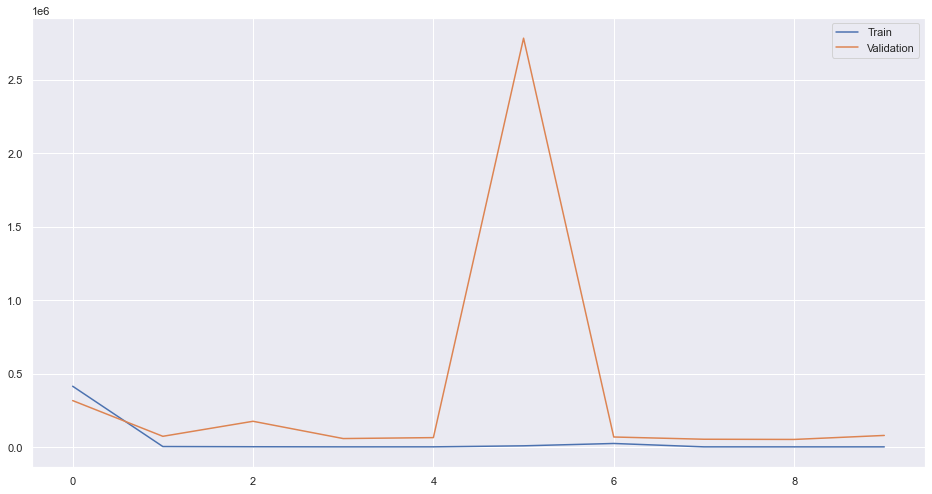

In [76]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

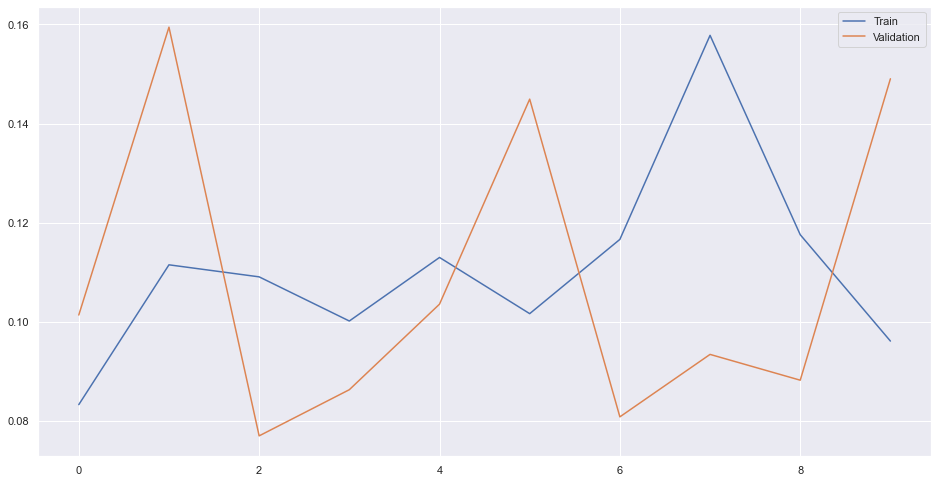

In [77]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()

In [78]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 10, 9
# split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_2 = model.predict(x_input, verbose=0)
print(yhat_2)

(2853, 10)
[[ 7507.2744  7377.6865  7551.7886 ...  7145.475   7338.278   7658.6743]
 [ 7650.3057  7506.0015  7442.218  ...  7213.039   7289.6978  7574.362 ]
 [ 7770.135   7590.8447  7479.4214 ...  7356.6323  7414.166   7691.609 ]
 ...
 [16606.213  16188.861  16998.092  ... 15017.948  16256.676  16436.682 ]
 [16117.568  16188.001  16639.752  ... 15435.871  16261.681  17014.799 ]
 [16646.396  16366.68   16561.66   ... 16206.651  16559.53   16907.592 ]]


In [79]:
test_mean_2 = np.mean(yhat_2,axis=1)

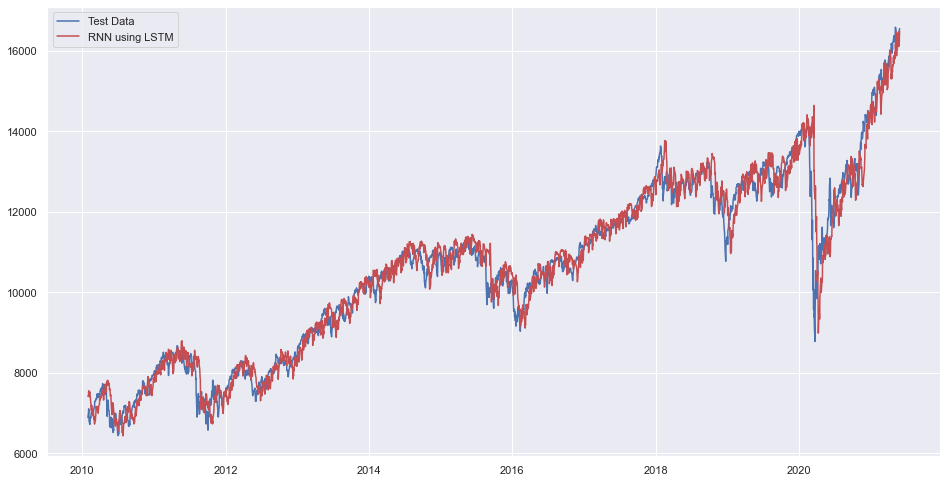

In [80]:
plt.plot(data_test.Date[18:],data_test.Close[18:],'-b',label='Test Data')
plt.plot(data_test.Date[18:],test_mean_2,'r',label='RNN using LSTM')
plt.legend()

In [81]:
r2_score(data_test.Close[18:], test_mean_2)

0.9574355662832538

In [82]:
mean_squared_error(data_test.Close[18:],test_mean_2)

205868.8201887645

In [83]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split data into samples
X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(11072, 3, 1)


In [84]:
# model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 3, 200)            161600    
_________________________________________________________________
lstm_7 (LSTM)                (None, 3, 200)            320800    
_________________________________________________________________
lstm_8 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 803,602
Trainable params: 803,602
Non-trainable params: 0
_________________________________________________________________


In [85]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
232/232 - 7s - loss: 512138.0000 - accuracy: 0.5097 - val_loss: 15544.1328 - val_accuracy: 0.4669
Epoch 2/10
232/232 - 4s - loss: 367.4778 - accuracy: 0.4991 - val_loss: 15164.7432 - val_accuracy: 0.4789
Epoch 3/10
232/232 - 4s - loss: 364.0060 - accuracy: 0.4972 - val_loss: 15109.9131 - val_accuracy: 0.4666
Epoch 4/10
232/232 - 4s - loss: 357.2559 - accuracy: 0.4984 - val_loss: 15512.5244 - val_accuracy: 0.4663
Epoch 5/10
232/232 - 4s - loss: 340.6812 - accuracy: 0.4992 - val_loss: 13792.8330 - val_accuracy: 0.4652
Epoch 6/10
232/232 - 4s - loss: 326.3022 - accuracy: 0.5018 - val_loss: 11148.0908 - val_accuracy: 0.4718
Epoch 7/10
232/232 - 4s - loss: 284.7003 - accuracy: 0.5063 - val_loss: 17121.8984 - val_accuracy: 0.4691
Epoch 8/10
232/232 - 4s - loss: 252.8251 - accuracy: 0.5074 - val_loss: 12731.0840 - val_accuracy: 0.4704
Epoch 9/10
232/232 - 4s - loss: 283.0667 - accuracy: 0.5054 - val_loss: 12648.5371 - val_accuracy: 0.4915
Epoch 10/10
232/232 - 4s - loss: 235.8188 -

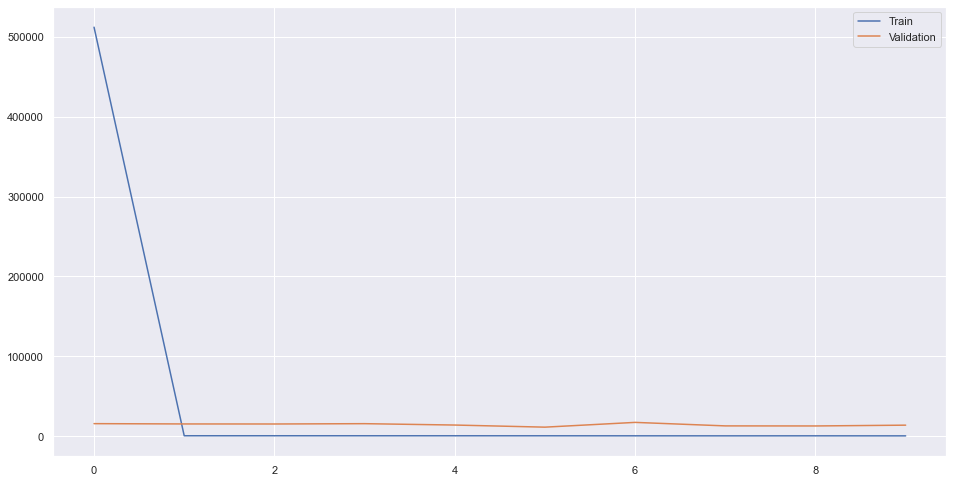

In [86]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
#plt.ylim(0,10000)

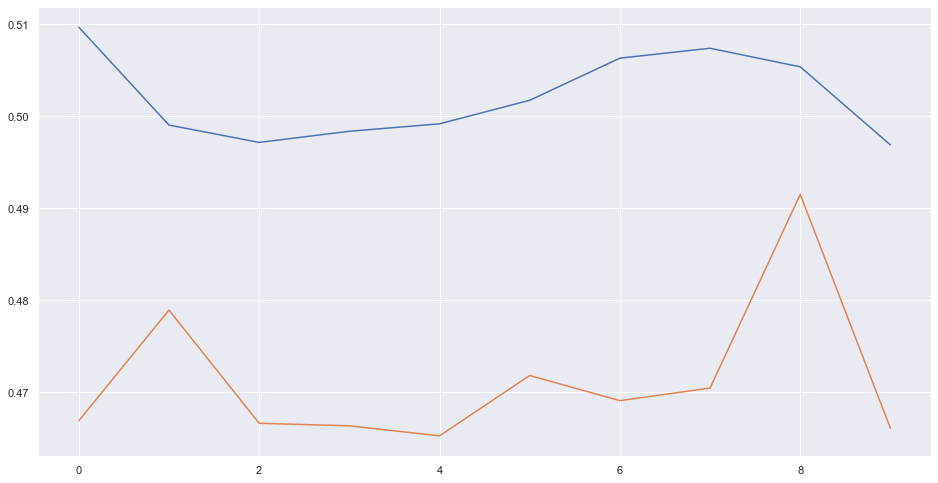

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [88]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_3 = model.predict(x_input, verbose=0)
print(yhat_3)

(2867, 3)
[[ 7432.8105  7416.037 ]
 [ 7452.6934  7434.1357]
 [ 7490.511   7474.844 ]
 ...
 [16769.678  16724.348 ]
 [16498.736  16453.98  ]
 [16653.36   16605.111 ]]


In [89]:
test_mean_3 = np.mean(yhat_3,axis=1)

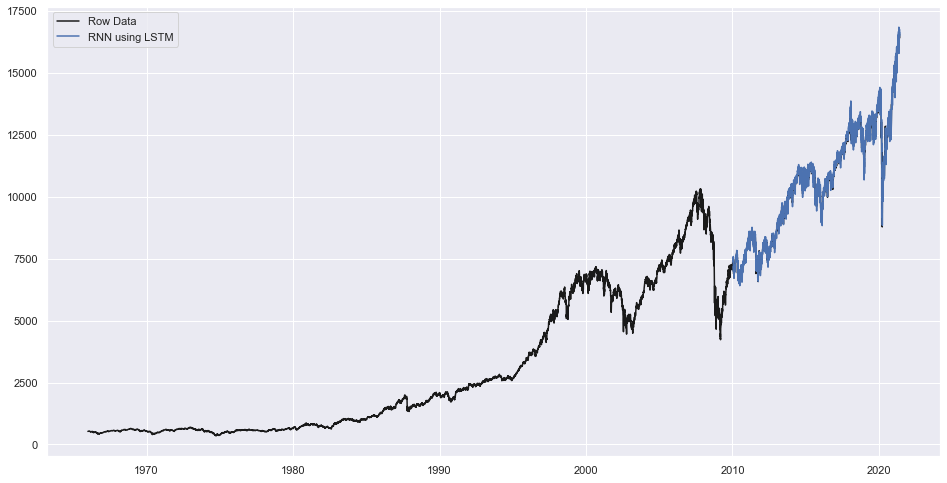

In [90]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test.Date[4:],test_mean_3,label='RNN using LSTM')
plt.legend()

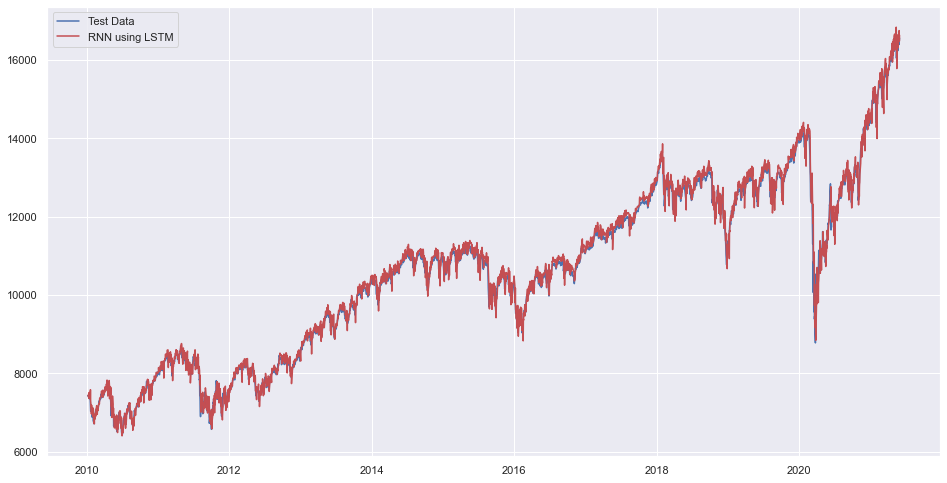

In [91]:
plt.plot(data_test.Date[4:],data_test.Close[4:],'-b',label='Test Data')
plt.plot(data_test.Date[4:],test_mean_3,'r',label='RNN using LSTM')
plt.legend()

In [92]:
r2_score(data_test.Close[4:], test_mean_3)

0.992080810027927

In [93]:
mean_squared_error(data_test.Close[4:],test_mean_3)

38545.6867332892

In [94]:
data_train_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date < "2015-01-01"]
data_test_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date >= "2015-01-01"]

In [95]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(data_train_N100.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(3830, 3, 1)


In [96]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 3, 200)            161600    
_________________________________________________________________
lstm_10 (LSTM)               (None, 3, 200)            320800    
_________________________________________________________________
lstm_11 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 803,602
Trainable params: 803,602
Non-trainable params: 0
_________________________________________________________________


In [97]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
81/81 - 5s - loss: 427339.9375 - accuracy: 0.5168 - val_loss: 400.5199 - val_accuracy: 0.5340
Epoch 2/10
81/81 - 1s - loss: 862.6145 - accuracy: 0.5012 - val_loss: 171.8761 - val_accuracy: 0.5261
Epoch 3/10
81/81 - 1s - loss: 243.6916 - accuracy: 0.5035 - val_loss: 132.2885 - val_accuracy: 0.5127
Epoch 4/10
81/81 - 1s - loss: 208.9895 - accuracy: 0.4992 - val_loss: 127.5942 - val_accuracy: 0.5150
Epoch 5/10
81/81 - 1s - loss: 191.7622 - accuracy: 0.5160 - val_loss: 120.2105 - val_accuracy: 0.4866
Epoch 6/10
81/81 - 1s - loss: 194.4132 - accuracy: 0.5012 - val_loss: 127.8883 - val_accuracy: 0.4921
Epoch 7/10
81/81 - 1s - loss: 192.0237 - accuracy: 0.5086 - val_loss: 130.0004 - val_accuracy: 0.4937
Epoch 8/10
81/81 - 1s - loss: 185.3240 - accuracy: 0.4957 - val_loss: 125.3945 - val_accuracy: 0.4889
Epoch 9/10
81/81 - 1s - loss: 190.5805 - accuracy: 0.4945 - val_loss: 112.0178 - val_accuracy: 0.4992
Epoch 10/10
81/81 - 1s - loss: 198.0131 - accuracy: 0.4910 - val_loss: 130.9397

(0.0, 1000.0)

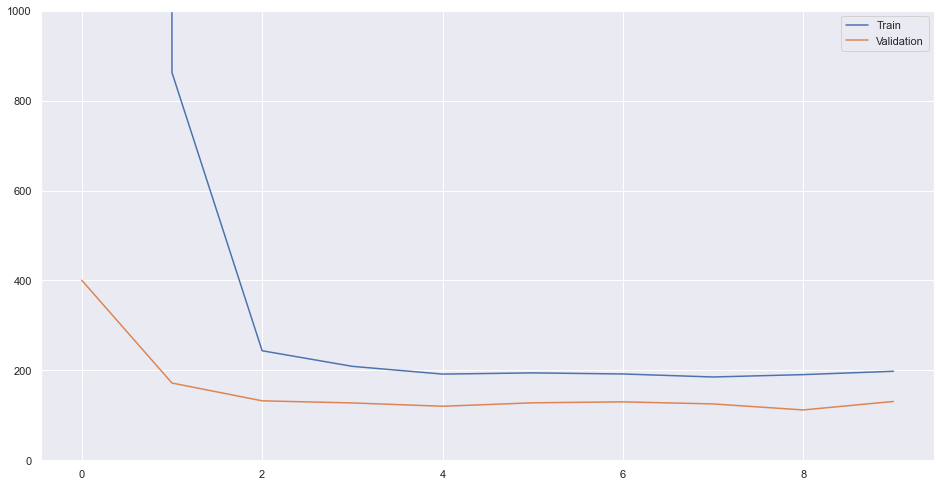

In [98]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.ylim(0,1000)

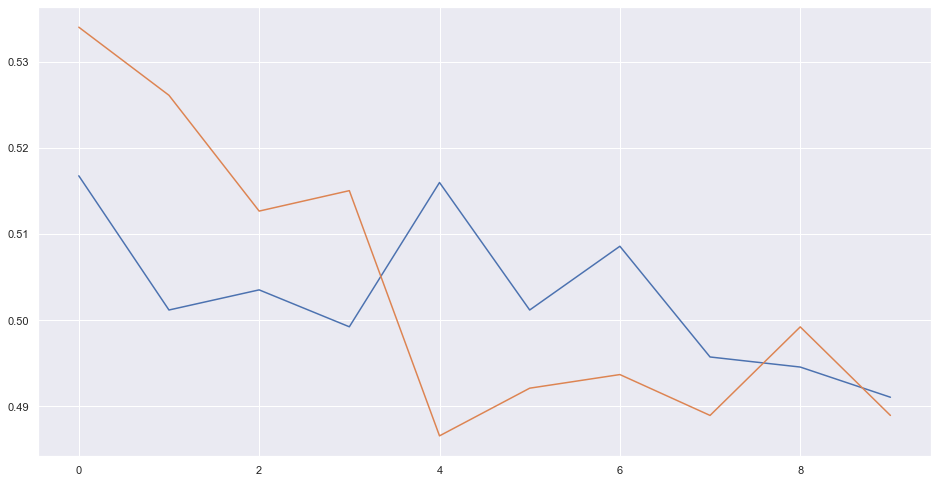

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [100]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(data_test_N100.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_N100 = model.predict(x_input, verbose=0)
print(yhat_N100)

(1636, 3)
[[ 802.6154   819.6329 ]
 [ 810.00793  808.7089 ]
 [ 819.9771   814.74164]
 ...
 [1246.161   1237.0149 ]
 [1251.1344  1243.3889 ]
 [1248.6975  1238.3335 ]]


In [101]:
test_mean_N100 = np.mean(yhat_N100,axis=1)
test_mean_N100

array([ 811.12415,  809.3584 ,  817.3594 , ..., 1241.5879 , 1247.2617 ,
       1243.5155 ], dtype=float32)

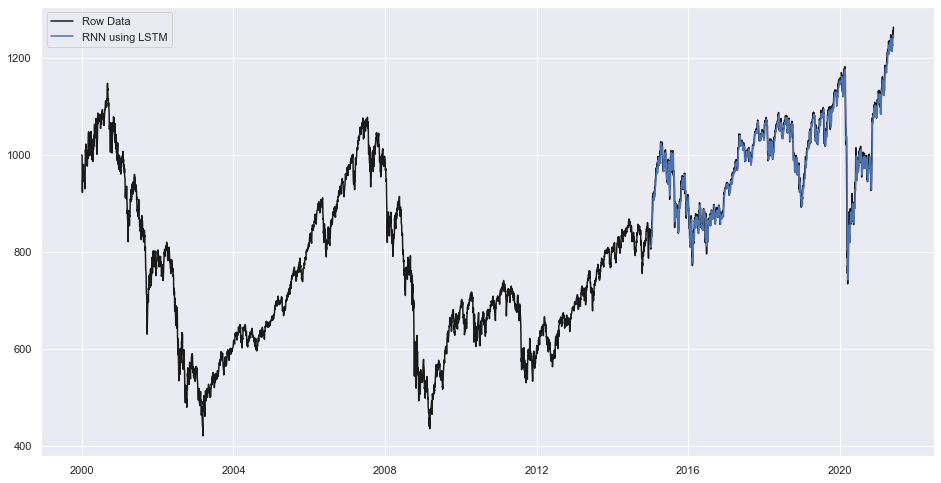

In [102]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test_N100.Date[4:],test_mean_N100,label='RNN using LSTM')
plt.legend()

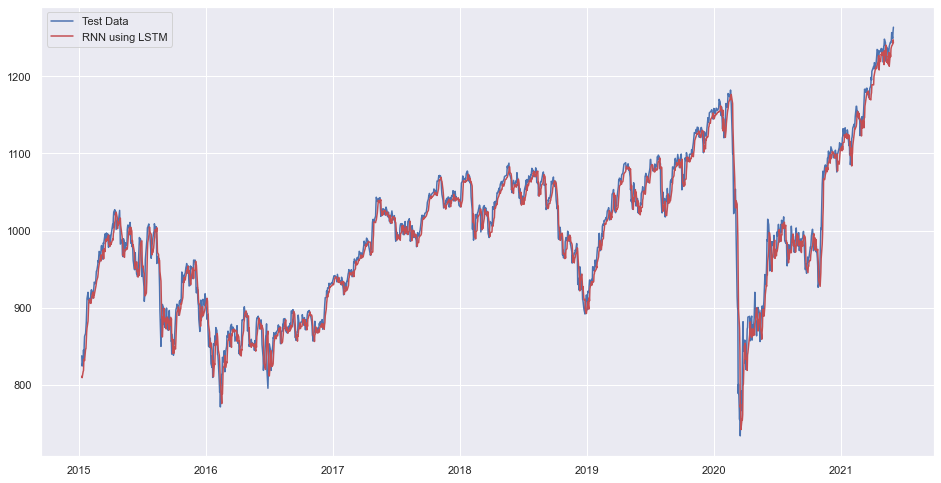

In [103]:
plt.plot(data_test_N100.Date[4:],data_test_N100.Close[4:],'-b',label='Test Data')
plt.plot(data_test_N100.Date[4:],test_mean_N100,'r',label='RNN using LSTM')
plt.legend()

In [104]:
r2_score(data_test_N100.Close[4:], test_mean_N100)

0.9639122018136755

In [105]:
mean_squared_error(data_test_N100.Close[4:],test_mean_N100)

328.3233526886407

In [106]:
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split into samples
X, y = split_sequence(data_train_N100.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(3824, 10, 1)


In [107]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 200)           161600    
_________________________________________________________________
lstm_13 (LSTM)               (None, 10, 200)           320800    
_________________________________________________________________
lstm_14 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [108]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
81/81 - 7s - loss: 272480.8125 - accuracy: 0.0000e+00 - val_loss: 600.6058 - val_accuracy: 0.0000e+00
Epoch 2/10
81/81 - 4s - loss: 599.8549 - accuracy: 0.0000e+00 - val_loss: 206.6707 - val_accuracy: 0.0000e+00
Epoch 3/10
81/81 - 4s - loss: 332.1899 - accuracy: 0.0000e+00 - val_loss: 181.8271 - val_accuracy: 0.0000e+00
Epoch 4/10
81/81 - 4s - loss: 301.7142 - accuracy: 0.0000e+00 - val_loss: 410.6621 - val_accuracy: 0.0000e+00
Epoch 5/10
81/81 - 4s - loss: 350.7594 - accuracy: 0.0000e+00 - val_loss: 139.2934 - val_accuracy: 0.0000e+00
Epoch 6/10
81/81 - 4s - loss: 225.7270 - accuracy: 0.0000e+00 - val_loss: 103.1459 - val_accuracy: 0.0000e+00
Epoch 7/10
81/81 - 4s - loss: 219.2267 - accuracy: 0.0000e+00 - val_loss: 129.5920 - val_accuracy: 0.0000e+00
Epoch 8/10
81/81 - 4s - loss: 254.3579 - accuracy: 0.0000e+00 - val_loss: 144.1590 - val_accuracy: 0.0000e+00
Epoch 9/10
81/81 - 4s - loss: 215.4722 - accuracy: 0.0000e+00 - val_loss: 154.8206 - val_accuracy: 0.0000e+00
Epoch 1

(0.0, 1000.0)

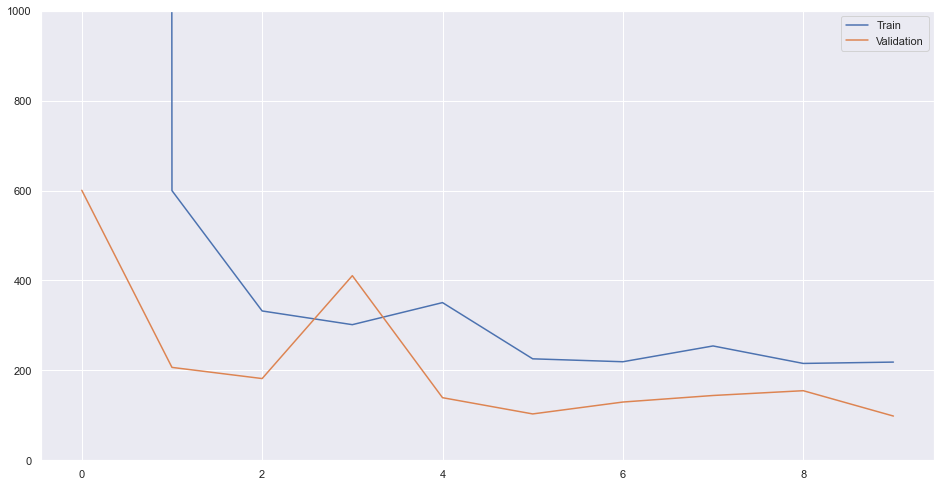

In [109]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.ylim(0,1000)

In [110]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split into samples
X, y = split_sequence(data_test_N100.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_N100_3 = model.predict(x_input, verbose=0)
print(yhat_N100_3)

(1630, 10)
[[ 844.87384]
 [ 853.33875]
 [ 845.8644 ]
 ...
 [1257.5951 ]
 [1258.9408 ]
 [1256.447  ]]


In [111]:
test_mean_N100_3 = np.mean(yhat_N100_3,axis=1)
test_mean_N100_3

array([ 844.87384,  853.33875,  845.8644 , ..., 1257.5951 , 1258.9408 ,
       1256.447  ], dtype=float32)

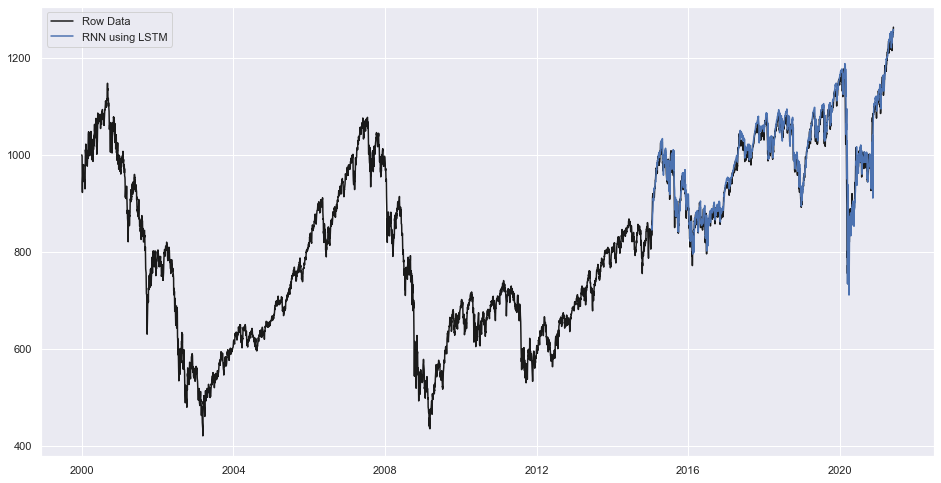

In [112]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test_N100.Date[10:],test_mean_N100_3,label='RNN using LSTM')
plt.legend()

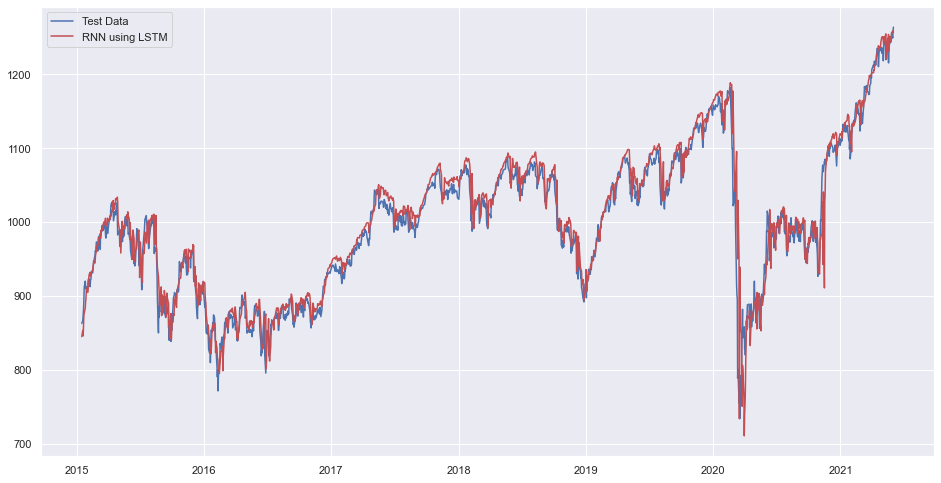

In [113]:
plt.plot(data_test_N100.Date[10:],data_test_N100.Close[10:],'-b',label='Test Data')
plt.plot(data_test_N100.Date[10:],test_mean_N100_3,'r',label='RNN using LSTM')
plt.legend()

In [114]:
r2_score(data_test_N100.Close[10:], test_mean_N100_3)

0.9457765900165215

In [115]:
mean_squared_error(data_test_N100.Close[10:],test_mean_N100_3)

490.05633726099825